In [2]:
import pandas as pd

In [49]:
#df = pd.read_pickle("../data/pickle/sampled_by_subreddit2.pkl")[['body', 'subreddit']]
df = pd.read_pickle("../output/twd/askreddit_tfidf.pkl")[['body']]

df.head()

,body
t0,0.01747
t1,-0.00560
t2,-0.00164
t3,-0.00559
t4,-0.00809


In [28]:
bad_phrases = []
with open("../data/filtering/filter_text.txt", "r") as infile:
    bad_phrases = [l.replace("\n", "") for l in infile.readlines()]
bad_phrases

['[Report a Bug]',
 "Bleep Bloop. I'm NOT a bot",
 'This comment was removed',
 'The transaction is now **CONFIRMED**',
 'view the metric conversion for this comment',
 'Please review the subreddit rules',
 'I am a bot',
 "I'm a bot",
 'This crosspost was performed automatically',
 'Off-Topic Discussion',
 'Your submission violates rule',
 'This video has been removed by a bot',
 'This post was marked as a question and has been removed to reduce clutter',
 'Good bot',
 'This was crossposted directly from']

In [39]:
def pass_filters(jline):
    text = jline['body']
    for p in bad_phrases:
        if p in text:
            return False
    return True

#df[df['body'].apply(bad_phrase)]

import json
pass_filters(json.loads(
    '{"body":"*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Overwatch) if you have any questions or concerns.*"}'))

False

In [35]:
def bad_phrase(text):
    for p in bad_phrases:
        if p in text:
            return True
    return False

df[df['body'].apply(bad_phrase)].iloc[0]['body']

'Please resubmit your post without PSA in the title. Thank you.\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Overwatch) if you have any questions or concerns.*'

In [50]:
#df = pd.read_pickle("../data/pickle/sbs_topic_word_dist2.pkl")
#df = pd.read_pickle("../data/pickle/askreddit_twd.pkl")
df = pd.read_pickle("../output/twd/askreddit_tfidf.pkl")
df.head()

,00,000,000m,000th,001,0010,00am,00pm,00s,01,...,утро,ಠ_ಠ,ㅋㅋㅋ,希望,有料,望月,無料,ﬂˆ,ﬂˇ,ﬂﬁ
t0,0.00281,0.00678,0.00002,0.00019,0.00019,0.00003,0.00028,0.00006,0.00012,0.00031,...,0.00008,0.00012,0.00003,0.00002,0.00011,0.00002,0.00011,0.00001,0.00001,0.00001
t1,-0.00103,-0.00231,-0.00001,-0.00007,-0.00003,-0.00000,-0.00006,-0.00002,-0.00004,-0.00011,...,-0.00002,-0.00004,-0.00001,-0.00001,-0.00004,-0.00001,-0.00004,-0.00000,-0.00000,-0.00000
t2,-0.00021,0.00024,-0.00000,-0.00001,0.00045,0.00009,-0.00001,-0.00001,0.00002,0.00001,...,-0.00003,-0.00001,-0.00001,-0.00000,-0.00001,-0.00000,-0.00001,-0.00000,-0.00000,-0.00000
t3,0.00016,-0.00394,-0.00002,-0.00045,-0.00017,-0.00003,-0.00025,-0.00014,-0.00007,-0.00015,...,0.00006,-0.00004,-0.00001,-0.00004,-0.00015,-0.00004,-0.00015,-0.00000,-0.00000,-0.00000
t4,-0.00172,-0.00467,-0.00001,-0.00048,-0.00022,-0.00004,0.00059,-0.00001,-0.00016,-0.00050,...,0.00026,-0.00005,-0.00000,0.00001,0.00005,0.00001,0.00005,-0.00001,-0.00001,-0.00001


In [51]:
columns = [c for c in df.columns if c.isalpha()]
df = df[columns]
df

,aa,aaa,aaaaaaaaaaaaaaaaaahhhhhhhhh,aaaahhhh,aaaand,aaand,aaargh,aagghh,aah,aaifjdasifjjiejifa,...,товарищ,утро,ㅋㅋㅋ,希望,有料,望月,無料,ﬂˆ,ﬂˇ,ﬂﬁ
t0,0.00041,0.00020,0.00003,0.00007,0.00019,0.00004,0.00003,0.00001,0.00012,0.00008,...,0.00023,0.00008,0.00003,0.00002,0.00011,0.00002,0.00011,0.00001,0.00001,0.00001
t1,-0.00016,-0.00007,-0.00001,-0.00003,-0.00007,-0.00001,-0.00001,-0.00000,-0.00005,-0.00003,...,-0.00006,-0.00002,-0.00001,-0.00001,-0.00004,-0.00001,-0.00004,-0.00000,-0.00000,-0.00000
t2,-0.00004,-0.00001,-0.00000,-0.00001,0.00000,-0.00001,-0.00000,-0.00000,-0.00002,0.00002,...,-0.00006,-0.00003,-0.00001,-0.00000,-0.00001,-0.00000,-0.00001,-0.00000,-0.00000,-0.00000
t3,-0.00062,0.00004,-0.00001,-0.00018,0.00046,-0.00000,-0.00003,0.00000,0.00017,-0.00011,...,-0.00001,0.00006,-0.00001,-0.00004,-0.00015,-0.00004,-0.00015,-0.00000,-0.00000,-0.00000
t4,-0.00082,-0.00022,0.00005,-0.00017,-0.00004,-0.00006,-0.00002,-0.00000,0.00009,-0.00001,...,0.00035,0.00026,-0.00000,0.00001,0.00005,0.00001,0.00005,-0.00001,-0.00001,-0.00001
t5,0.00020,-0.00022,-0.00005,0.00006,0.00012,0.00002,0.00000,0.00001,-0.00039,-0.00000,...,0.00026,0.00015,-0.00004,0.00001,0.00005,0.00001,0.00005,-0.00001,-0.00001,-0.00001
t6,-0.00066,-0.00008,-0.00002,-0.00014,0.00002,-0.00005,0.00002,0.00000,-0.00009,0.00023,...,-0.00018,-0.00001,0.00007,-0.00001,0.00010,-0.00001,0.00010,0.00000,0.00000,0.00000
t7,-0.00007,0.00004,-0.00001,-0.00002,0.00023,-0.00002,0.00000,0.00000,-0.00008,-0.00004,...,0.00021,-0.00005,0.00002,0.00001,-0.00007,0.00001,-0.00007,0.00000,0.00000,0.00000
t8,-0.00002,0.00004,0.00003,0.00003,0.00101,-0.00005,0.00005,-0.00000,0.00005,-0.00004,...,0.00021,0.00015,-0.00002,0.00001,0.00002,0.00001,0.00002,-0.00000,-0.00000,-0.00000
t9,0.00026,-0.00011,0.00001,0.00002,0.00006,0.00007,-0.00002,-0.00000,-0.00017,-0.00011,...,0.00011,0.00004,-0.00007,-0.00003,0.00002,-0.00003,0.00002,-0.00001,-0.00001,-0.00001


In [36]:
[i for i in df.loc['t0'].to_dict().items() if i[1] not in STOPWORDS]

[('aa', 0.00049),
 ('aaron', 9e-05),
 ('abandon', 0.00073),
 ('abandoned', 0.00171),
 ('abandoning', 0.00028),
 ('abilities', 0.00072),
 ('ability', 0.00501),
 ('able', 0.02576),
 ('abnormal', 0.00031),
 ('abortion', 0.00151),
 ('abraham', 0.00049),
 ('abroad', 0.00077),
 ('abruptly', 7e-05),
 ('abs', 0.00064),
 ('absence', 0.00037),
 ('absent', 0.00023),
 ('absolute', 0.00263),
 ('absolutely', 0.01089),
 ('absorbed', 0.00071),
 ('abstract', 9e-05),
 ('absurd', 0.00078),
 ('abundant', 0.0002),
 ('abuse', 0.00395),
 ('abused', 0.00267),
 ('abuser', 0.00054),
 ('abusing', 0.00057),
 ('abusive', 0.00375),
 ('ac', 0.0007),
 ('aca', 0.00029),
 ('academic', 0.00069),
 ('academically', 0.00052),
 ('academy', 0.0002),
 ('accelerate', 0.00089),
 ('accelerating', 0.00033),
 ('acceleration', 0.00035),
 ('accent', 0.00091),
 ('accents', 0.00043),
 ('accept', 0.00823),
 ('acceptable', 0.00177),
 ('acceptance', 0.0002),
 ('accepted', 0.00277),
 ('accepting', 0.00164),
 ('accepts', 0.00048),
 ('acces

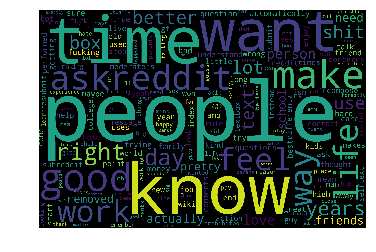

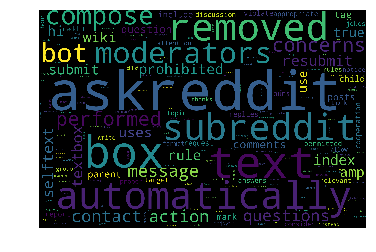

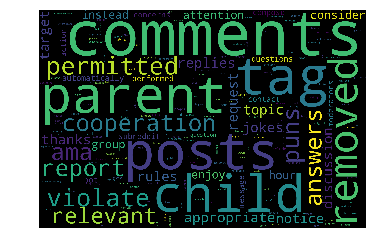

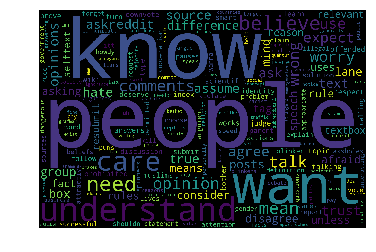

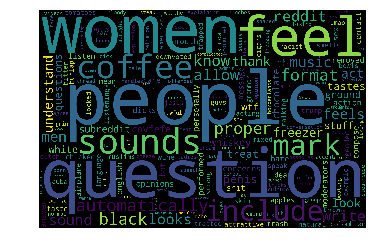

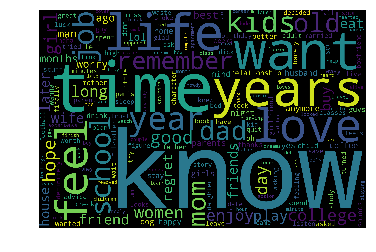

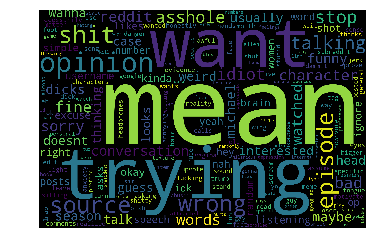

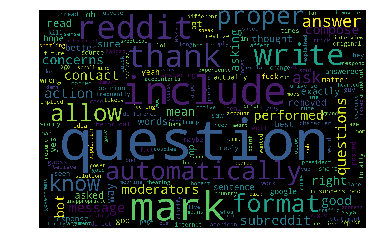

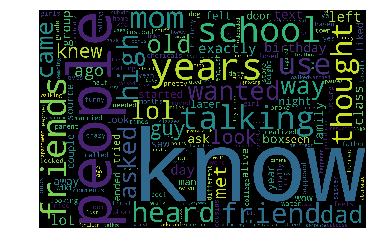

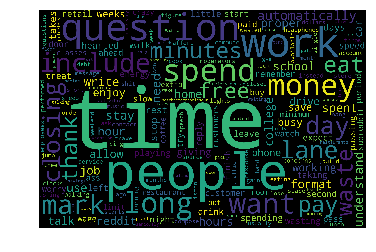

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

% matplotlib inline

stopwords = ["didn", "like", "don", "really", "post", "just", "said", "think", "ll", "got", "ve", "going",
            "gotta", "apparently", "very", "went", "aren", "dont", "doesn", "thing", "things", "say", "probably", 
            "literally", "let", "told", "wasn", "title", "submission", "edited", "comment", "wouldn", "titles", "tell",
            "saying"]
for s in stopwords:
    STOPWORDS.add(s)

wordcloud = WordCloud(stopwords=STOPWORDS,
                     width=2400, height=1600)
#pic = wordcloud.generate("abandon aberg abilities able abc abandon")

for i in range(0, 10):
    dic = df.loc['t{}'.format(i)].to_dict()
    for s in STOPWORDS:
        if s in dic:
            del dic[s]
    pic = wordcloud.generate_from_frequencies(dic)

    plt.imshow(pic)
    plt.axis('off')
    plt.show()